In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [86]:
#Loading the data
car_data = pd.read_csv("car data.csv")

In [87]:
car_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [88]:
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [89]:
#encoding "Fuel_Type" column
car_data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace = True)

#encoding "Seller_Type" column
car_data.replace({"Selling_type":{"Dealer":0,"Individual":1}},inplace = True)

#encoding "Transmission" column
car_data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace = True)

In [90]:
car_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [91]:
 # Splitting the data into the different splits
X = car_data.drop(["Car_Name", "Selling_Price"], axis=1)
Y = car_data["Selling_Price"]

# Checking the shapes to ensure they are correct
print(X.shape)
print(Y.shape)

# Train-Test Split 
# Correcting the order of the output variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Checking the shapes after the split
print(X_train.shape)  
print(Y_train.shape)  

# MODEL TRAINING
reg = RandomForestRegressor()
reg.fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


(301, 7)
(301,)
(240, 7)
(240,)


In [92]:
Y.head(5)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [93]:
car_data.shape

(301, 9)

In [94]:
# MODEL EVALUATION FOR THE TRAINING DATA
reg_training_preds = reg.predict(X_train) 

error_score = metrics.r2_score(Y_train,reg_training_preds)
print(f"The R square erroris:{error_score}")

The R square erroris:0.9883319540914526


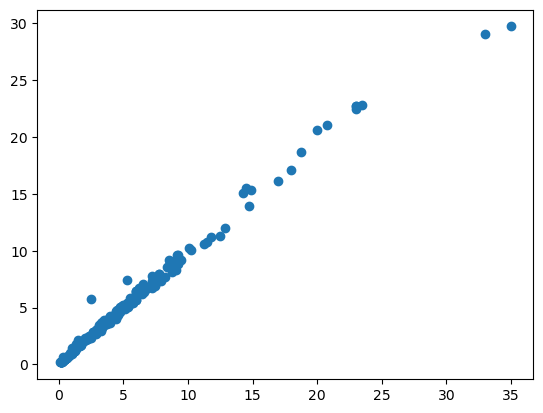

In [95]:
#Visualizing the plot
plt.scatter(Y_train,reg_training_preds)
plt.xlabel = ("Actual Price") 
plt.ylabel = ("Predicted Price")
plt.title = ("Actual Price vs Predicted Price")
plt.show();

In [96]:
# MODEL EVALUATION FOR THE TEST DATA
reg_test_preds = reg.predict(X_test)
error_score_2 = metrics.r2_score(Y_test,reg_test_preds)
print(f"The R square error for the test data is :{error_score}")

The R square error for the test data is :0.9883319540914526


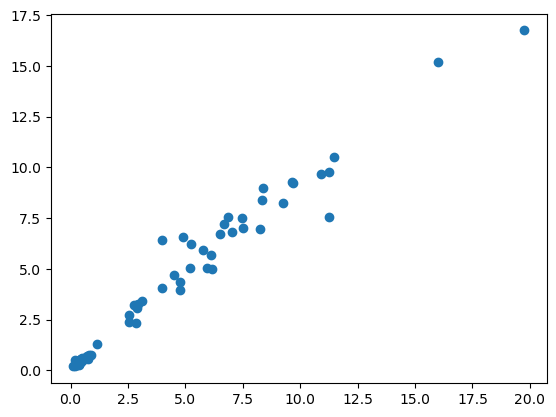

In [97]:
#Visualizing the plot
plt.scatter(Y_test,reg_test_preds)
plt.xlabel = ("Actual Price") 
plt.ylabel = ("Predicted Price")
plt.title = ("Actual Price vs Predicted Price")
plt.show();